# Resolvendo um Problema Linearmente Separável

Autor: Vyctor Lima Negreiros

## Descrição da atividade

Construir o algoritmo de treinamento do neurônio perceptron para resolver o problema de classificação proposto.

IMPORTAÇÃO DE BIBLIOTECAS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from perceptron import *

FUNÇÕES AUXILIARES

In [2]:
# A partir dos dados lidos do dataset realiza a separação das saídas esperadas
def separar_saidas(registros):
    saida = []
    for registro in registros:
        saida.append(registro[2])
    saidas = np.array(saida,dtype=int)
    return saidas

In [3]:
# A partir das saídas cria uma lista com sua respectiva cor de classificação
def criar_cores(saidas):
    cores = []
    for saida in saidas:
        if(saida == 0):
            cores.append('red')
        else:
            cores.append('blue')
    return cores

In [4]:
# A partir dos dados lidos do dataset realiza a separação das entradas
def separar_entradas(registros):
    entrada = []
    for registro in registros:
        entrada.append([])
        entrada[-1].append(-1)
        entrada[-1].append(registro[0])
        entrada[-1].append(registro[1])
    entradas = np.array(entrada,dtype=float)
    return entradas

LEITURA DO DATASET

In [5]:
# Leitura do arquivo dataAll.txt
data = np.fromfile("../datasets/dataAll.txt", dtype=float)
print(data.shape)

(3000,)


TRATAMENTO DO DATASET

In [6]:
# Redimensionamento do array
registros = data.reshape(data.size//3, 3)
print(registros.shape)
print()

(1000, 3)



In [7]:
# Criação de um array das saídas
saidas = separar_saidas(registros)
print(saidas.shape)

(1000,)


In [8]:
# Criação de um array das entradas
entradas = separar_entradas(registros)
print(entradas.shape)

(1000, 3)


APRENDIZADO SUPERVISIONADO DO NEURÔNIO PERCEPTRON

In [9]:
# Inicialização das variáveis
taxa_aprendizagem = 0.1
teta = 0
pesos = np.random.uniform(-0.5, 0.5, entradas.shape[1])
print(pesos)

[0.10308933 0.18296014 0.14141143]


In [10]:
# Treinamento do perceptron
pesos, epocas, ajustes_por_epoca, s = treinamento(entradas, saidas, pesos, taxa_aprendizagem, teta)

Peso: [0.10308933 0.18296014 0.14141143]
Pesos:  [  0.20308933  16.68123014 -61.18022857]
Pesos:  [  0.10308933  89.47725014 -25.35066857]
Pesos:  [   0.20308933    5.94764014 -124.47649857]
Pesos:  [   0.30308933   55.13450014 -107.84776857]
Pesos:  [  0.20308933 137.73320014 -27.99193857]
Pesos:  [   0.30308933   97.72429014 -105.88462857]
Pesos:  [  0.40308933 147.18511014 -56.99057857]
Pesos:  [   0.50308933  107.63586014 -154.08461857]
Pesos:  [  0.60308933 199.87784014 -67.61204857]
Pesos:  [  0.70308933 187.98073014 -95.51158857]
Pesos:  [   0.80308933  159.77327014 -129.09570857]
Pesos:  [   0.70308933   95.48406014 -197.16033857]
Pesos:  [   0.60308933  148.58838014 -161.38093857]
Pesos:  [   0.70308933  213.57954014 -100.48925857]
Pesos:  [   0.60308933  162.64596014 -163.88922857]
Pesos:  [  0.70308933 249.78072014 -77.19939857]
Pesos:  [   0.80308933  197.86539014 -133.40041857]
Pesos:  [   0.90308933  132.97936014 -208.01650857]
Pesos:  [   0.80308933  200.01701014 -157.85

Pesos:  [-3.96910673e-01  6.18775680e+02 -4.55604529e+02]
Pesos:  [-4.96910673e-01  5.72628300e+02 -5.12253909e+02]
Pesos:  [  -0.59691067  542.74424014 -545.36323857]
9 ajustes no vetor de pesos na época 10
Pesos:  [  -0.69691067  625.63611014 -462.58174857]
Pesos:  [  -0.79691067  579.48873014 -519.23112857]
Pesos:  [  -0.89691067  549.60467014 -552.34045857]
9 ajustes no vetor de pesos na época 11
Pesos:  [  -0.99691067  632.49654014 -469.55896857]
Pesos:  [  -1.09691067  586.34916014 -526.20834857]
Pesos:  [  -1.19691067  556.46510014 -559.31767857]
9 ajustes no vetor de pesos na época 12
Pesos:  [  -1.29691067  639.35697014 -476.53618857]
Pesos:  [  -1.39691067  593.20959014 -533.18556857]
Pesos:  [  -1.49691067  563.32553014 -566.29489857]
9 ajustes no vetor de pesos na época 13
Pesos:  [  -1.39691067  650.46029014 -479.60506857]
Pesos:  [  -1.29691067  598.54496014 -535.80608857]
Pesos:  [  -1.39691067  516.05221014 -626.54053857]
Pesos:  [  -1.49691067  605.76101014 -547.531818

In [11]:
print("Total de Épocas: ", epocas)
print("Pesos finais: ", pesos)
print("Total de ajustes de pesos:", sum(ajustes_por_epoca))

Total de Épocas:  16
Pesos finais:  [  -1.59691067  594.82706014 -592.62762857]
Total de ajustes de pesos: 585


GRÁFICO DA SOLUÇÃO

In [12]:
# Criando a lista de cores
cores = criar_cores(saidas)
# Cálculo dos coeficientes da linha de decisão
b = pesos[0]/pesos[2]
a = -1 * (pesos[1]/pesos[2])
# Criando os pontos da linha de decisão
x, y = [], []
menor = int(math.ceil(min(entradas[:,1])))
maior = int(math.ceil(max(entradas[:,1])))
for i in range(menor, maior, 1):
    x.append(i)
    valor = b + a*(i)
    y.append(valor)
print(a, b)

1.0037113213347666 0.0026946274454007465


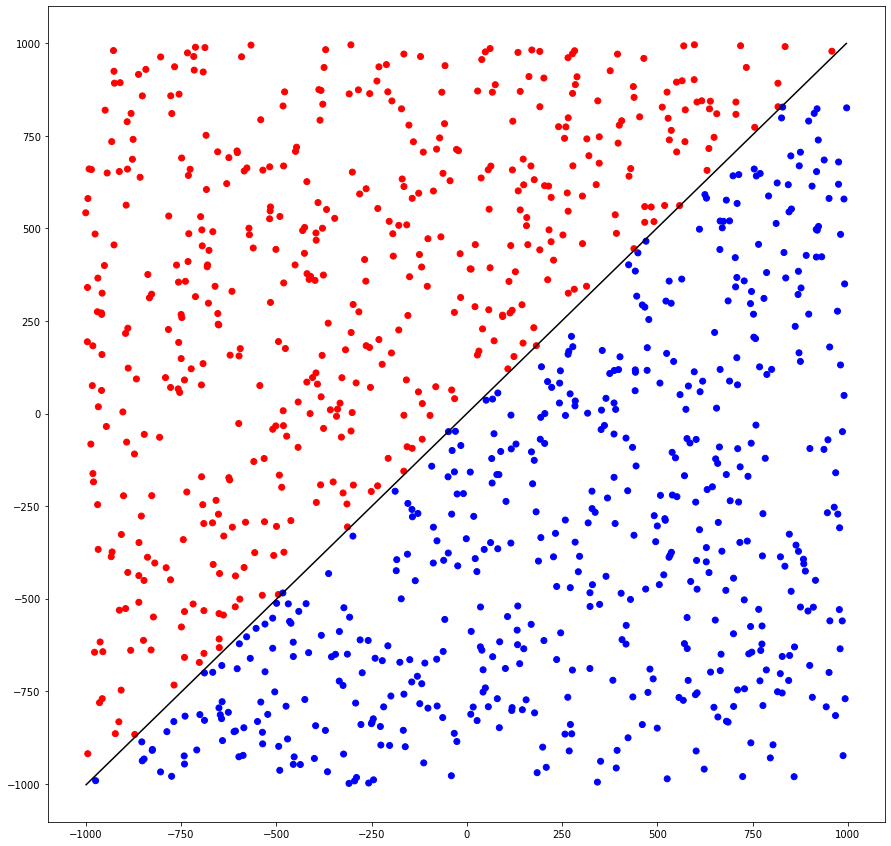

In [13]:
# Criação do gráfico
plt.rcParams['figure.figsize']=(15,15)
plt.pyplot.plot(x, y, color="black", markersize=100)
plt.pyplot.scatter(entradas[:,1], entradas[:,2], marker='o',color=cores)
plt.pyplot.show()